# E2a: Küchentischversuch zum Laval-Rotor

Name: Bianca Beer 

Datum: 06.01.2024 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Wie unterscheidet sich die Vibration am Handy durch einen  Wecker von der an einer Musikbox beim Abspielen eines Liedes.

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="handy.jpeg" width="500">

- Beschreibung des Aufbaus: Das Handy vibriert aufgrund eines Weckers und der Sensor ist am Handy festgeklebt.
- Vorgangsbeschreibung: Das Handy vibriert aufgrund eines Weckers.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240112_232207_BiancaBeer_mobile" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_232207_BiancaBeer_mobile.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240112_232207_BiancaBeer_mobile/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240112_232207_BiancaBeer_mobile/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240112_232207_BiancaBeer_mobile/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaca10-2510-60b5-9d8a-7ae533734d7a": {
    "type": "probe",
    "name": "mobile",
    "comment": "",
    "path": "measurement_data/data_202

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
# HDF5-Datei öffnen
path_h5_file = path_measurement_folder + "/" + h5_file_name
f = h5py.File(path_h5_file, "r")

# Daten auslesen
group_path = "RawData/"+sensor_settings_dict["ID"]   # Pfad zu den Datensätzen in HDF5-Datei
data = f[group_path]

# Einzeln Datensätze in numpy-arrays speichern
acceleration_x = np.array(data["acceleration_x"])
acceleration_y = np.array(data["acceleration_y"])
acceleration_z = np.array(data["acceleration_z"])
timestamp = np.array(data["timestamp"])

#HDF5-Datei schließen
f.close()

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
absolute_acc = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

[]

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


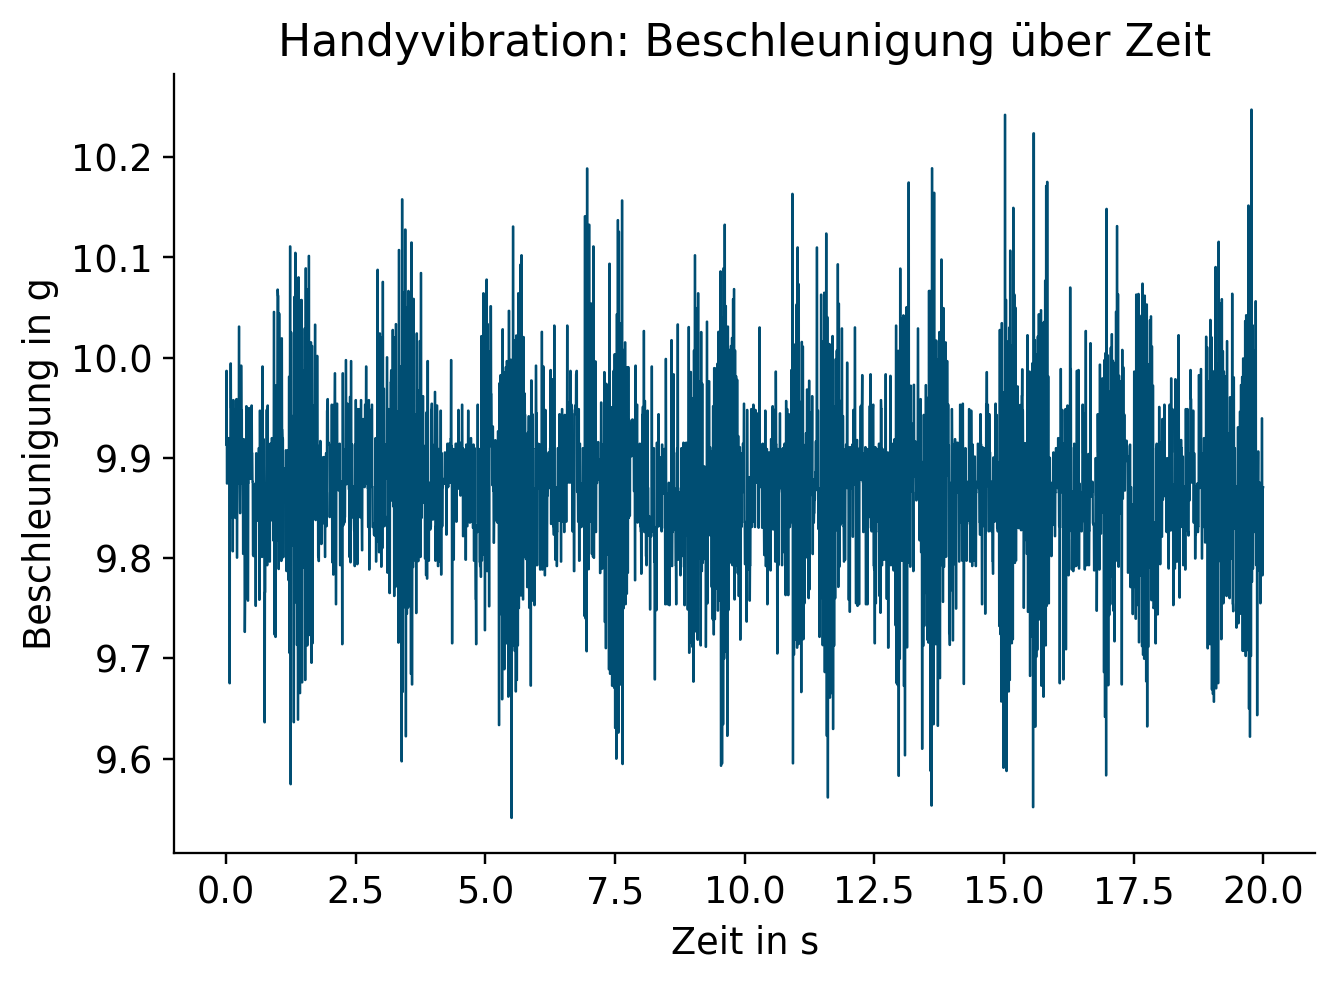

In [6]:
# Beschleunigung über Zeit plotten
plt.plot(timestamp, absolute_acc)
plt.title("Handyvibration: Beschleunigung über Zeit")   # Titel hinzufügen
plt.xlabel("Zeit in s")   # x-Achsenbeschriftung hinzufügen
plt.ylabel("Beschleunigung in g")   # y-Achsenbeschriftung hinzufügen

# Zeitliche Abstände
plt.plot()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

(time_lin, intpol_acc) = interpolation(timestamp, absolute_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

NameError: name 't' is not defined

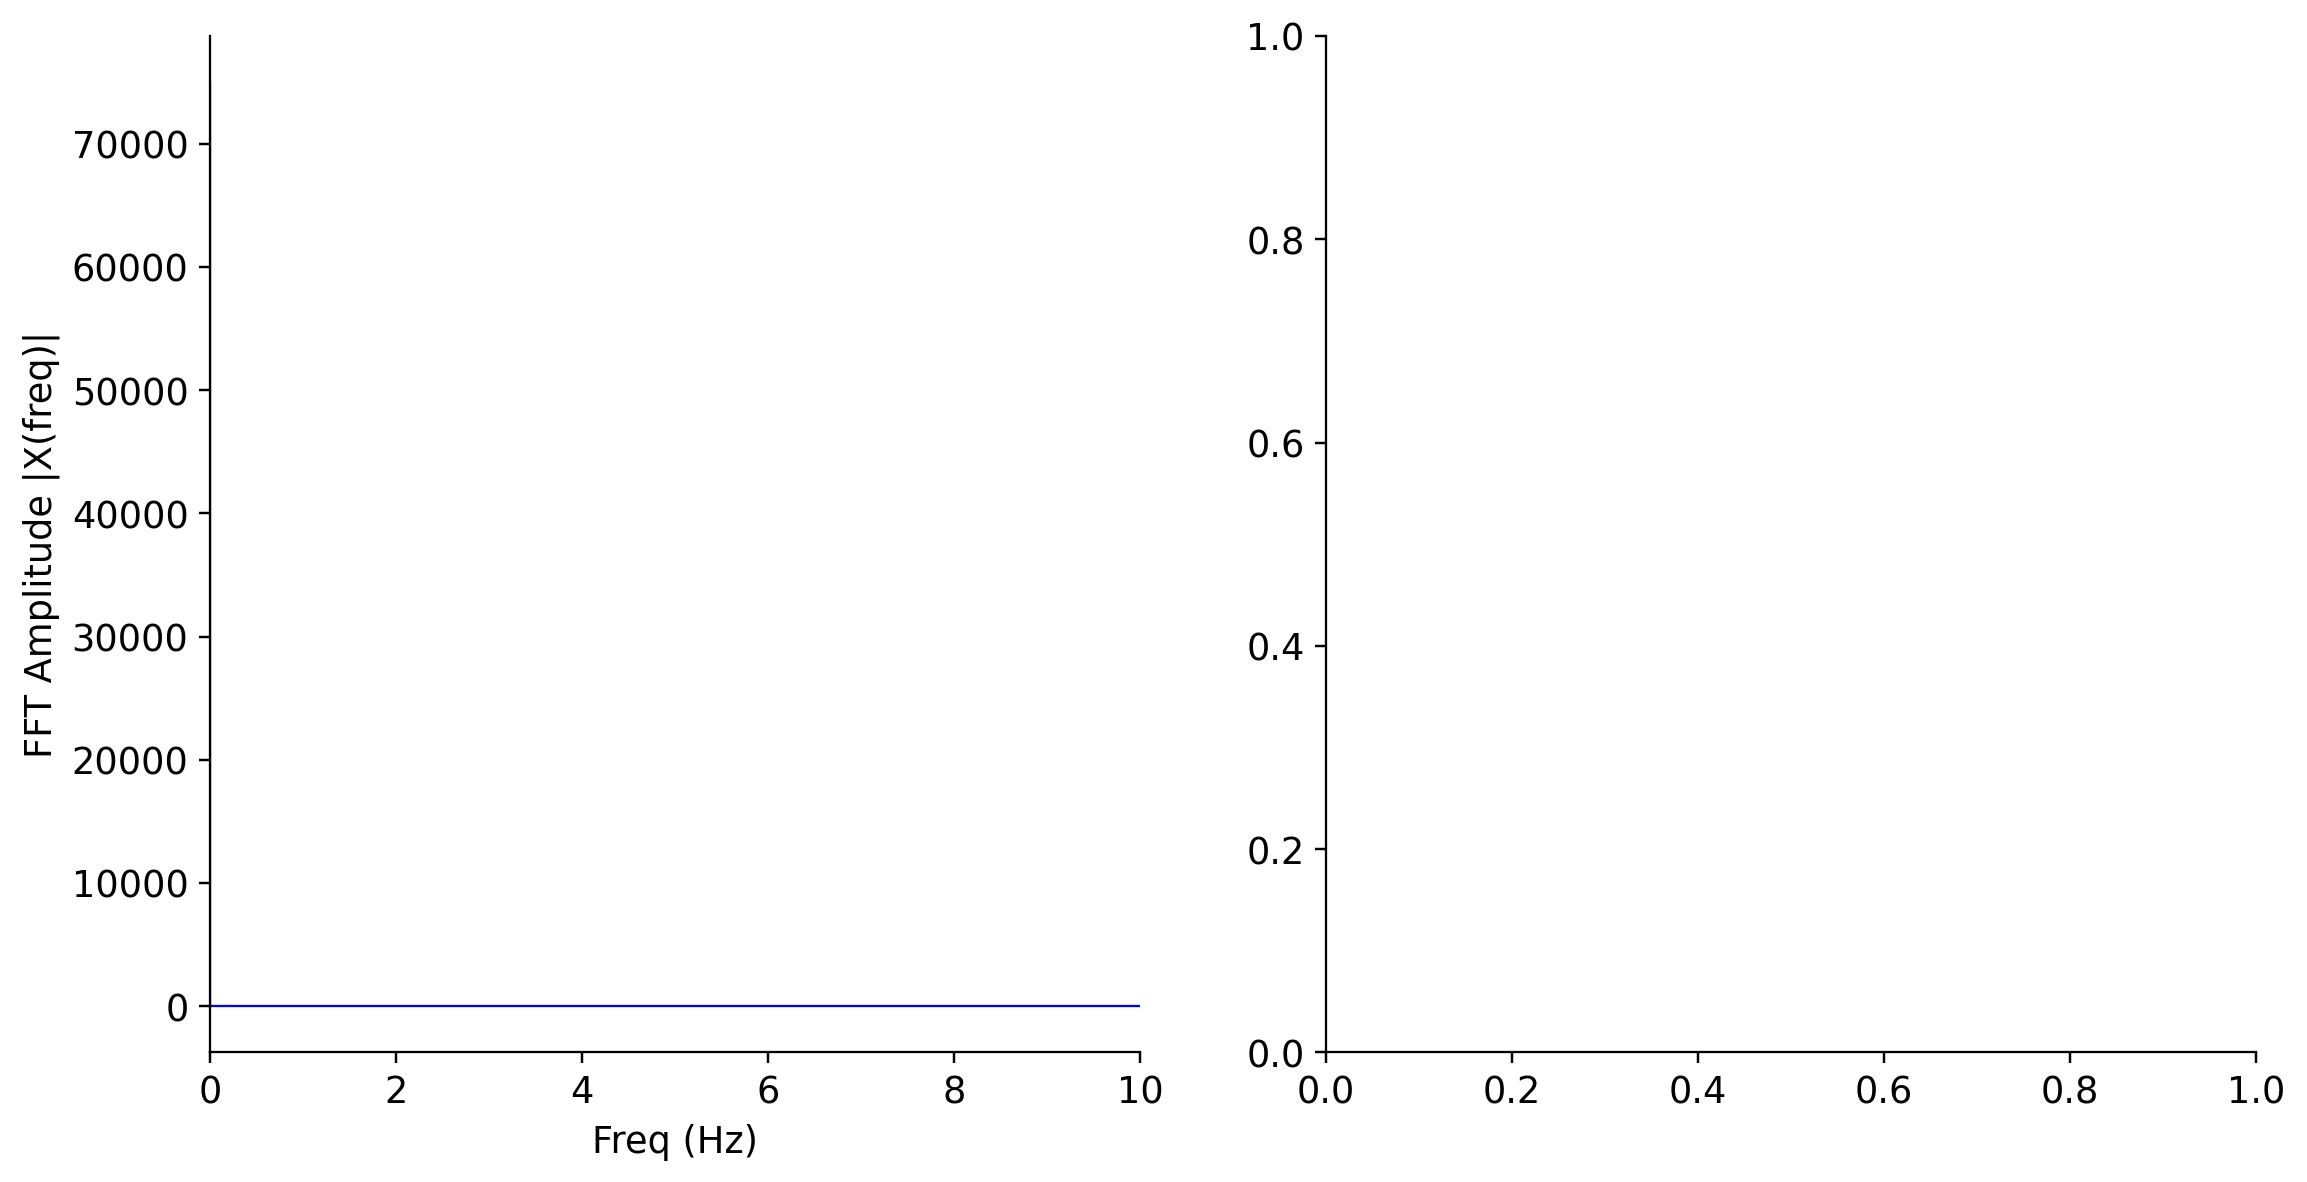

In [13]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
[amp, freq] = my_fft(intpol_acc,timestamp)

plt.figure(figsize = (12, 6))
plt.subplot(121)
    
plt.stem(freq, np.abs(amp), 'b', \
             markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
    
plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch1.jpg" width="500">

- Beschreibung des Aufbaus:
- Vorgangsbeschreibung:

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [ ]:
"""Parameter definition"""
path_measurement_folder = "measurement_data/data_20240112_233010_BiancaBeer_speaker" 
h5_file_name = "data_20240112_233010_BiancaBeer_speaker.h5"

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [ ]:
# HDF5-Datei öffnen
path_h5_file = path_measurement_folder + "/" + h5_file_name
f = h5py.File(path_h5_file, "r")

# Daten auslesen
group_path = "RawData/"+sensor_settings_dict["ID"]   # Pfad zu den Datensätzen in HDF5-Datei
data = f[group_path]

# Einzeln Datensätze in numpy-arrays speichern
acceleration_x = np.array(data["acceleration_x"])
acceleration_y = np.array(data["acceleration_y"])
acceleration_z = np.array(data["acceleration_z"])
timestamp = np.array(data["timestamp"])

#HDF5-Datei schließen
f.close()

#### 2. Betrag der Beschleunigung berechnen


In [ ]:
absolute_acc = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten

In [ ]:
# Beschleunigung über Zeit plotten
plt.plot(timestamp, absolute_acc)
plt.title("Handyvibration: Beschleunigung über Zeit")   # Titel hinzufügen
plt.xlabel("Zeit in s")   # x-Achsenbeschriftung hinzufügen
plt.ylabel("Beschleunigung in g")   # y-Achsenbeschriftung hinzufügen

# Zeitliche Abstände
plt.plot()

#### 4. Interpolation der Messwerte



In [ ]:
(time_lin, intpol_acc) = interpolation(timestamp, absolute_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen


In [ ]:
[amp, freq] = my_fft(intpol_acc,timestamp)

plt.figure(figsize = (12, 6))
plt.subplot(121)
    
plt.stem(freq, np.abs(amp), 'b', \
             markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
    
plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Es war gut, zu lernen, wie die 